<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Отчет-Sweetviz" data-toc-modified-id="Отчет-Sweetviz-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Отчет Sweetviz</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Формируем-матрицу-признаков-и-вектор-целевого-признака" data-toc-modified-id="Формируем-матрицу-признаков-и-вектор-целевого-признака-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Формируем матрицу признаков и вектор целевого признака</a></span></li><li><span><a href="#Изменяем-матрицу-признаков" data-toc-modified-id="Изменяем-матрицу-признаков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изменяем матрицу признаков</a></span></li><li><span><a href="#Создаем-случайную-матрицу-и-проверяем-обратимость" data-toc-modified-id="Создаем-случайную-матрицу-и-проверяем-обратимость-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Создаем случайную матрицу и проверяем обратимость</a></span></li><li><span><a href="#Создаём-новую-матрицу-данных-умножением-на-случайную." data-toc-modified-id="Создаём-новую-матрицу-данных-умножением-на-случайную.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Создаём новую матрицу данных умножением на случайную.</a></span></li><li><span><a href="#Ищем-метрики-качества-для-исходных-и-полученных-в-результате-преобразования-данных-и-сравниваем." data-toc-modified-id="Ищем-метрики-качества-для-исходных-и-полученных-в-результате-преобразования-данных-и-сравниваем.-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Ищем метрики качества для исходных и полученных в результате преобразования данных и сравниваем.</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

### Импорт библиотек

In [1]:
# импортирую библиотеки
!pip install sweetviz -q
import pandas as pd
import sklearn
import sweetviz as sv
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Обзор данных

In [2]:
insurance = pd.read_csv('/datasets/insurance.csv')
display(insurance.head(2))
insurance.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


<div class="alert alert-info">
    
<font size="3"><b> 5000 строк, 5 столбцов. Названия нужно привести к стилю. Без пропусков.

</b></font>
    
</div>

In [3]:
# приводим к стилю
insurance = insurance.rename(columns={'Пол': 'gender',
                        'Возраст': 'age',
                        'Зарплата': 'salary',
                        'Age': 'age',
                        'Члены семьи': 'family_members',
                        'Страховые выплаты': 'insurance_payments'
                       })
display(insurance.duplicated().sum())

153

In [4]:
# удаляем дубликаты
insurance = insurance.drop_duplicates()
insurance = insurance.reset_index(drop=True)

### Отчет Sweetviz

In [5]:
# анализируем данные
report_0 = sv.analyze(insurance)

                                             |          | [  0%]   00:00 -> (? left)

Report common_analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



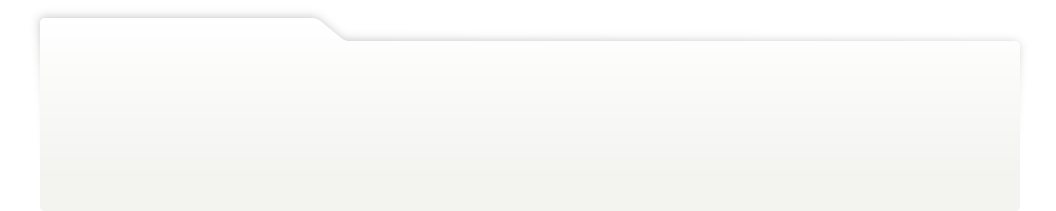
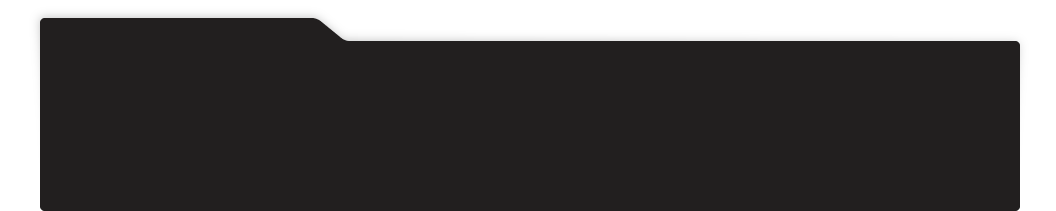
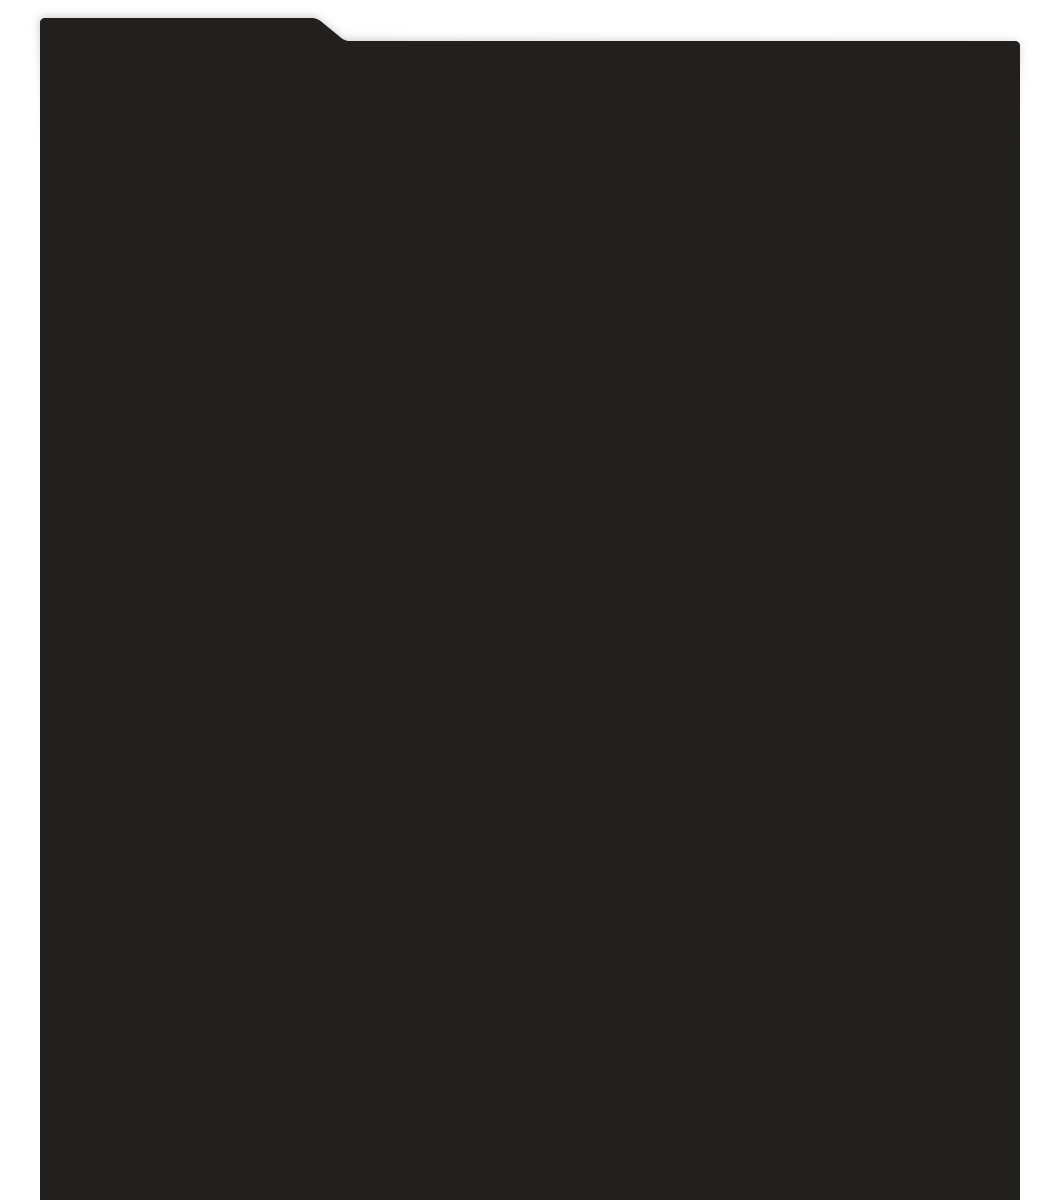
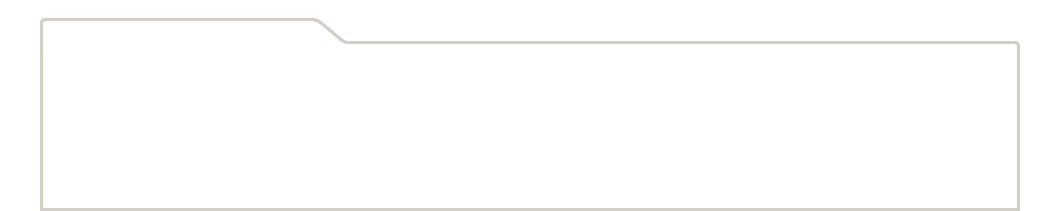
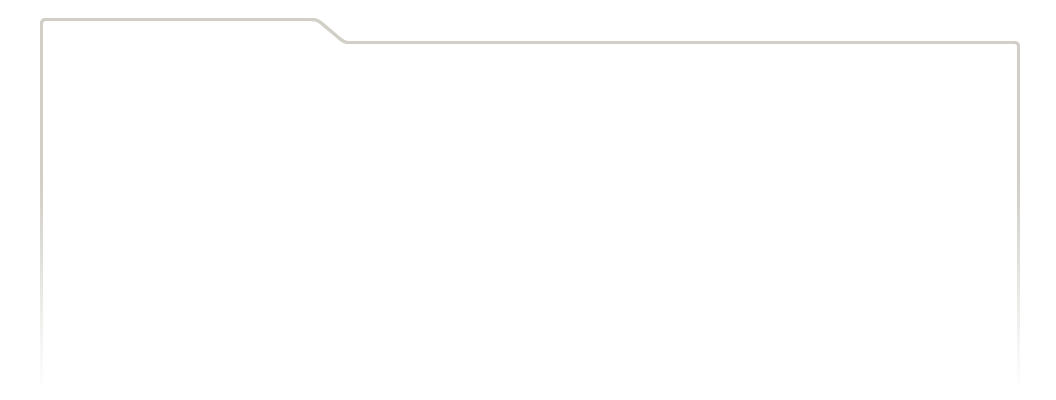
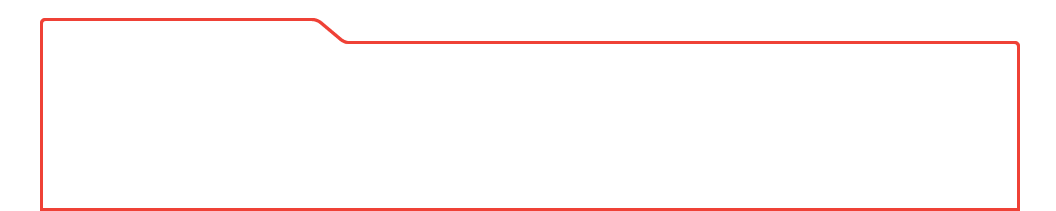
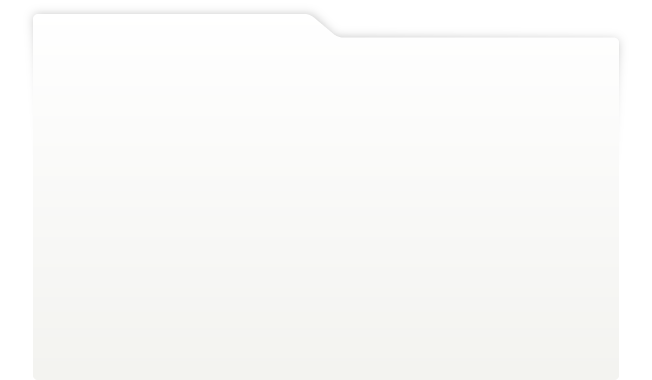
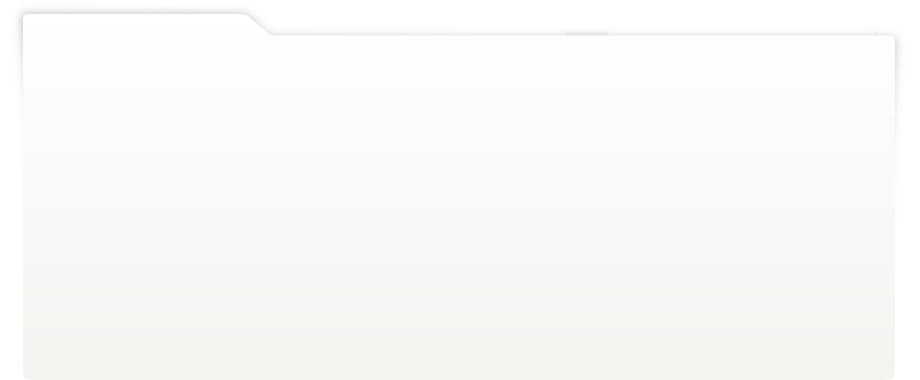
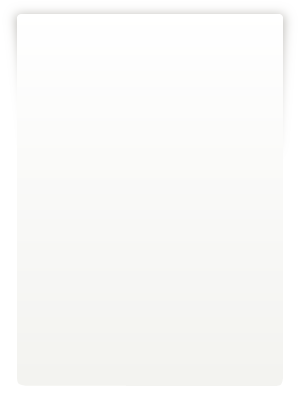
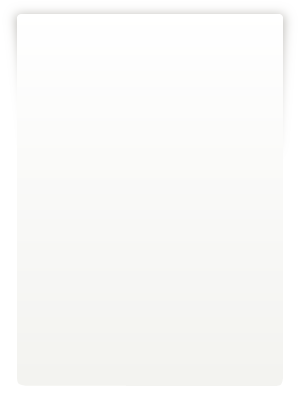
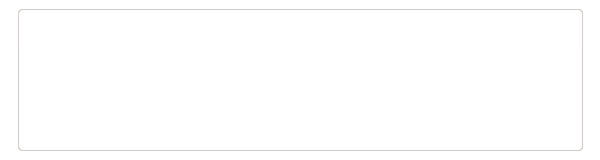
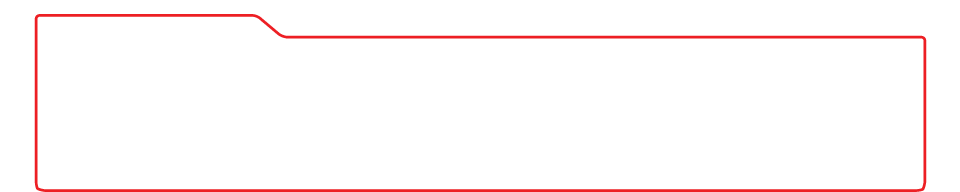
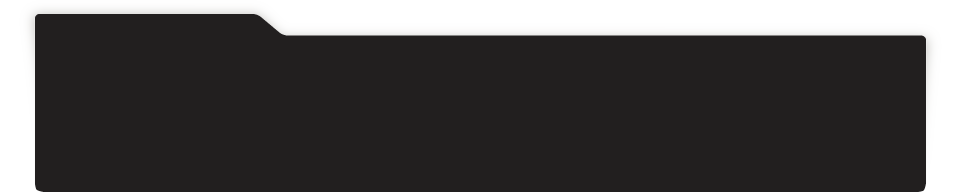
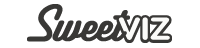
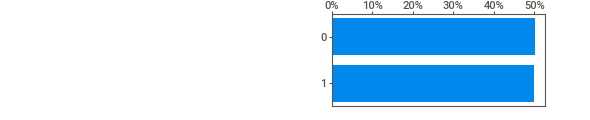
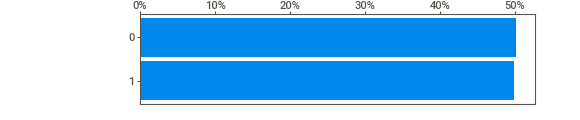
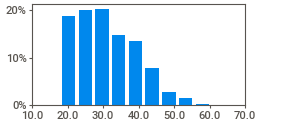
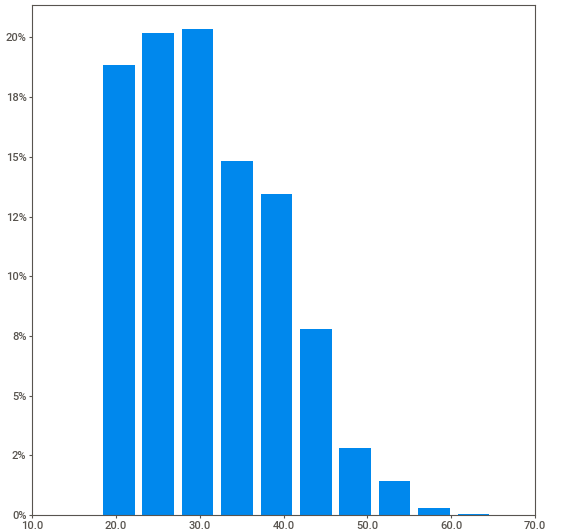
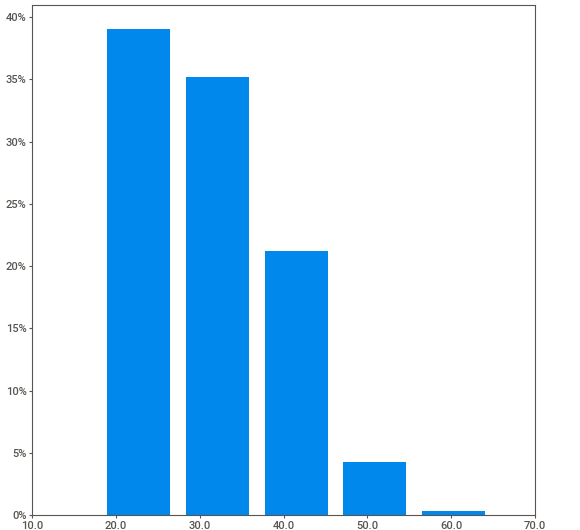
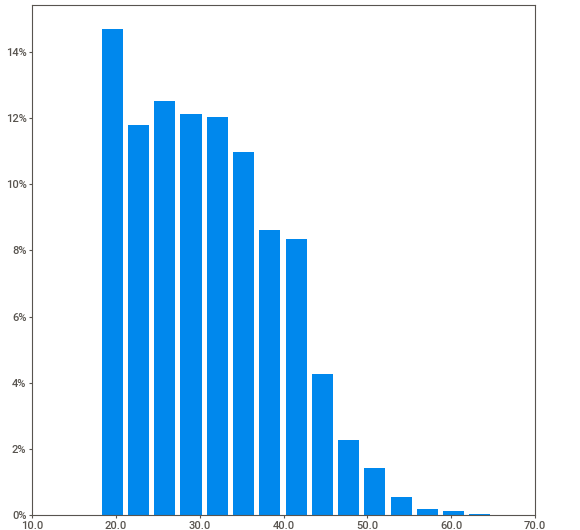
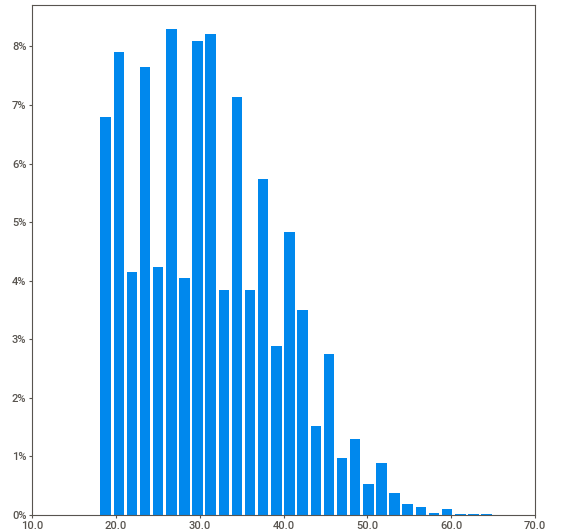
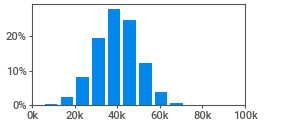
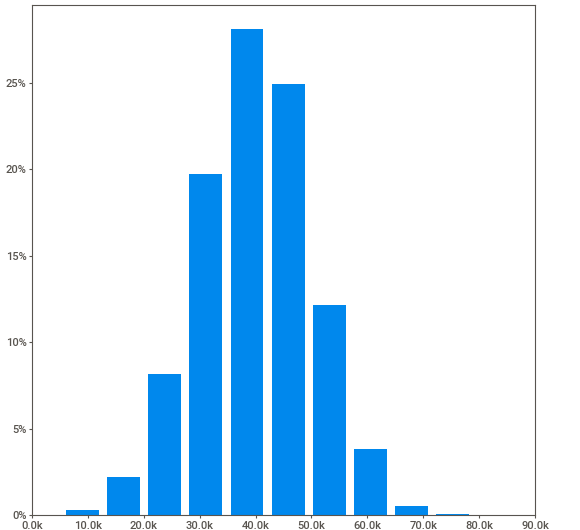
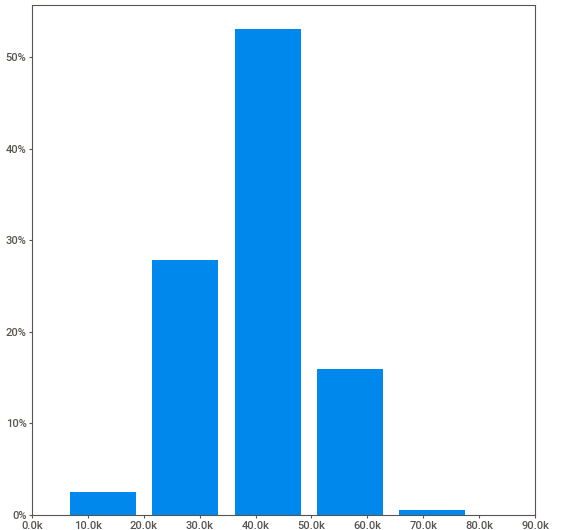
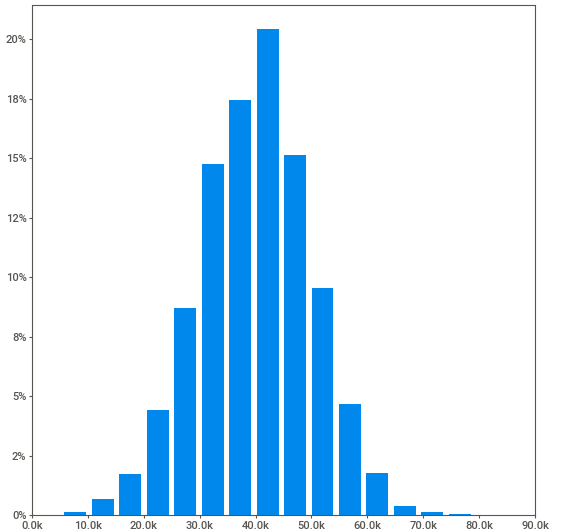
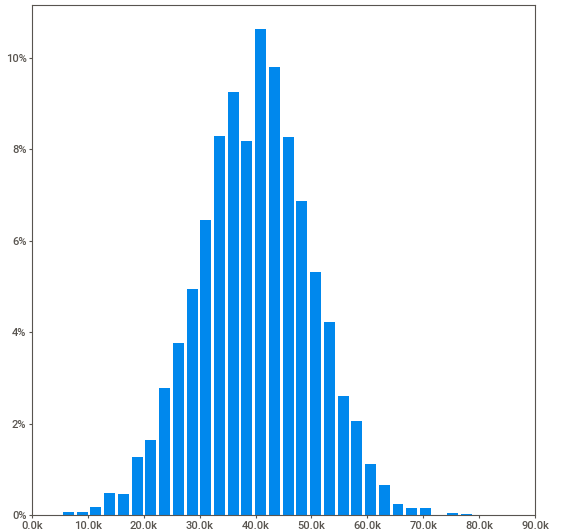
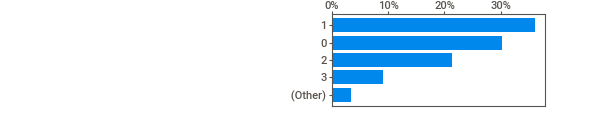
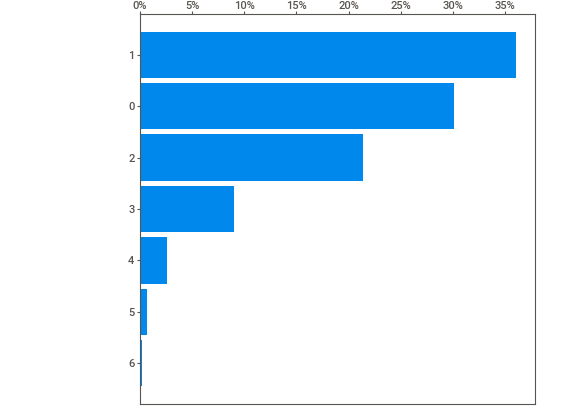
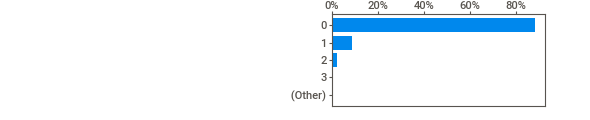
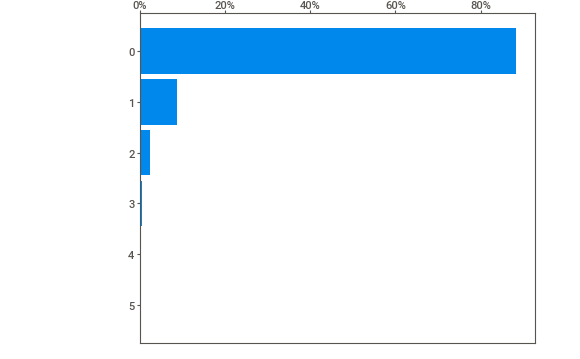
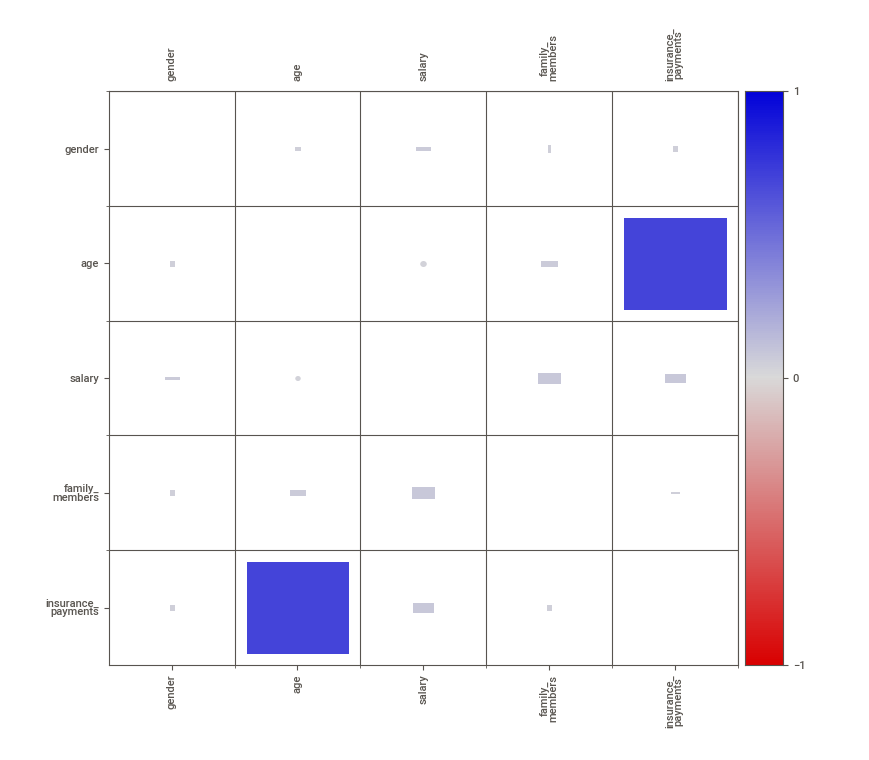
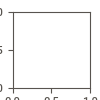

In [6]:
report_0.show_html('common_analysis.html')
report_0.show_notebook(layout='vertical', w=900, h=700, scale=0.8)

<div class="alert alert-info">
    
<font size="3"><b> В таблице в равной доле представлены мужчины и женщины в возрасте от 18 до
    65 лет с нормальным распределением зарплаты (средняя - 40,20, стандартное отклонение - 9,97)
    без экстремальных выбросов, с количеством членов семьи от 0 до 6 и страховыми выплатами от 0 до 5. Сильная корелляция 0,68 между возрастом и страховыми выплатами.
</b></font>
    
</div>

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**  качество линейной регресии при умножении признаков на обратимую матрицу не изменится.

**Цель:** увидеть, как связаны предсказания a и a', где

$$
a' = X'w'
$$

$$
X' = XP
$$

а, P - произвольная обратимая матрица

**Обоснование:** для доказательства используем формулы:

$$
(AB)^T = B^TA^T
$$

$$
(AB)^{-1} = B^{-1}A^{-1}
$$

$$
a = Xw = X(X^T X)^{-1} X^T y
$$

$$
a' = X'w' = (XP)((XP)^T X P)^{-1} (XP)^T y = (XP)(P^T X^T X P)^{-1} P^T X^T y 
$$

изменим вид формулы и раскроем формулу для обратной матрицы, как произведение трех квадратных

$$
a' = (XP)(P^T (X^T X) P)^{-1} P^T X^T y = (XP) P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y  
$$

по свойству единичной матрицы

$$
(P^T)^{-1} P^T = 1
$$


$$
a' = X P P^{-1} (X^T X)^{-1} X^T y = X (X^T X)^{-1} X^T y
$$

при окончательном преобразовании сократили Р по свойству единичной матрицы.

Получили равенство в формулах между предсказаниями a и a'.

**Вывод:** качество линейной регрессии в преобразованных данных не меняется.

## Алгоритм преобразования

**Алгоритм**

1. Сформировать исходную матрицу и вектор целевого признака.
2. Прибавим к матрице признаков 888.
3. Умножим на 17.
4. Создаём случайную матрицу.
5. Проверяем её на обратимость.
6. Создаём новую матрицу данных умножением на случайную.
7. Ищем метрики качества для исходных и полученных в результате преобразования данных и сравниваем.

**Обоснование**

Так как между признаками и целевым признаком у нас подразумевается линейное соотношение, то увеличение значения признаков и умножение их на константу изменит лишь весовые коэффициенты для определения целевого признака. Умножение же признаков на обратимую матрицу не изменит качество линейной регрессии, как показано выше в п.2.

## Проверка алгоритма

### Формируем матрицу признаков и вектор целевого признака

In [7]:
# определяем признаки
features = insurance.drop('insurance_payments', axis=1)
target = insurance['insurance_payments']
features.head()

,gender,age,salary,family_members
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


### Изменяем матрицу признаков 

In [8]:
features_transform = (features + 888) * 17 
features_transform.head()

,gender,age,salary,family_members
0,15113,15793.0,858296.0,15113
1,15096,15878.0,661096.0,15113
2,15096,15589.0,372096.0,15096
3,15096,15453.0,723996.0,15130
4,15113,15572.0,458796.0,15096


### Создаем случайную матрицу и проверяем обратимость

In [9]:
P = np.random.rand(4,4)
display(P)
# проверим обратимость
np.linalg.inv(P)

array([[0.12134896, 0.65769042, 0.03720721, 0.25247694],
       [0.20393597, 0.7628007 , 0.25426238, 0.77904712],
       [0.19595838, 0.89927634, 0.95902913, 0.06690083],
       [0.55983108, 0.44133236, 0.34976069, 0.71842951]])

array([[ 2.01539484, -2.93212803, -0.2091906 ,  2.49073873],
       [ 1.933258  , -0.3127993 ,  0.13664329, -0.35293542],
       [-2.10365306,  0.74493866,  0.98528119, -0.16025867],
       [-1.73394164,  2.11432658, -0.40060484, -0.25413622]])

<div class="alert alert-info">
    
<font size="3"><b> Полученная обратная матрица доказывает, что исходная случайная невырождена.
</b></font>
    
</div>

### Создаём новую матрицу данных умножением на случайную.

In [10]:
features_transform = features_transform @ P

### Ищем метрики качества для исходных и полученных в результате преобразования данных и сравниваем.

In [11]:
# определим функцию для r2
def metric(x, y):
    model = LinearRegression()
    model.fit(x, y)
    predictions = model.predict(x)
    r2 = r2_score(y, predictions)
    return r2

In [12]:
# r2 для исходных признаков
print('Метрика качества линейной регрессии R2 на исходных признаках:', metric(features, target))

Метрика качества линейной регрессии R2 на исходных признаках: 0.4302010044852066


In [13]:
# r2 для преобразованных признаков
print('Метрика качества линейной регрессии R2 на преобразованных признаках:', metric(features_transform, target))

Метрика качества линейной регрессии R2 на преобразованных признаках: 0.43020100448520504


## Вывод

<div class="alert alert-info">
    
<font size="3"><b> Загружены и изучены данные. Математически доказано. что качество линейной регрессии в 
преобразованных данных не меняется. Создан, обоснован и реализован алгоритм преобразования. Полученные метрики
регрессии очень близки, что позволяет сделать вывод о сохранении качества линейной регрессии.
</b></font>
    
</div>